In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
training_set = tf.keras.utils.image_dataset_from_directory(
    r'C:\JupyterNotebook\Detection2\New Plant Diseases Dataset(Augmented)\New Plant Diseases Dataset(Augmented)\train',  # Use raw string to avoid escape issues
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)


Found 70295 files belonging to 38 classes.


In [4]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    r'C:\JupyterNotebook\Detection2\New Plant Diseases Dataset(Augmented)\New Plant Diseases Dataset(Augmented)\valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 17572 files belonging to 38 classes.


In [5]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [6]:
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[175.75 177.75 189.75]
   [178.   180.   192.  ]
   [176.   178.   190.  ]
   ...
   [154.25 156.25 169.25]
   [157.   159.   172.  ]
   [156.5  158.5  171.5 ]]

  [[178.75 180.75 192.75]
   [183.   185.   197.  ]
   [180.25 182.25 194.25]
   ...
   [163.   165.   178.  ]
   [165.25 167.25 180.25]
   [161.25 163.25 176.25]]

  [[180.75 182.75 194.75]
   [182.25 184.25 196.25]
   [178.75 180.75 192.75]
   ...
   [161.   163.   176.  ]
   [161.   163.   176.  ]
   [155.25 157.25 170.25]]

  ...

  [[156.25 155.25 161.25]
   [177.25 176.25 182.25]
   [154.75 153.75 159.75]
   ...
   [166.5  165.5  173.5 ]
   [155.25 154.25 162.25]
   [161.5  160.5  168.5 ]]

  [[169.75 170.75 175.75]
   [150.   151.   156.  ]
   [161.75 162.75 167.75]
   ...
   [163.75 160.75 169.75]
   [157.25 154.25 163.25]
   [163.   160.   169.  ]]

  [[147.25 148.25 153.25]
   [159.   160.   165.  ]
   [167.75 168.75 173.75]
   ...
   [148.5  145.5  154.5 ]
   [151.75 148.75 157.75]
   [165.75 162.75 17

In [7]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential

In [9]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

C:\Users\Sourin\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [11]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [12]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [8]:
model = Sequential()

In [13]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [14]:
model.add(Dropout(0.25)) # To avoid Overfitting

In [15]:
model.add(Flatten())

In [16]:
model.add(Dense(units=1500,activation='relu'))

In [17]:
model.add(Dropout(0.4))

In [18]:
#Output Layer
model.add(Dense(units=38,activation='softmax'))

In [20]:
import tensorflow as tf

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),  
    loss='categorical_crossentropy',  
    metrics=['accuracy']
)


In [22]:
training_history = model.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 3234s 1s/step - accuracy: 0.3507 - loss: 2.3321 - val_accuracy: 0.8346 - val_loss: 0.5230
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 3145s 1s/step - accuracy: 0.8218 - loss: 0.5614 - val_accuracy: 0.8745 - val_loss: 0.3930
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2626s 1s/step - accuracy: 0.9006 - loss: 0.3106 - val_accuracy: 0.9150 - val_loss: 0.2640
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2154s 980ms/step - accuracy: 0.9327 - loss: 0.2082 - val_accuracy: 0.9140 - val_loss: 0.2626
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2056s 936ms/step - accuracy: 0.9497 - loss: 0.1529 - val_accuracy: 0.9429 - val_loss: 0.1756
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2155s 981ms/step - accuracy: 0.9606 - loss: 0.1224 - val_accuracy: 0.9591 - val_loss: 0.1292
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2056s 936ms/step - accuracy: 0.9689 - loss: 0.0942 - val_accuracy: 0.9635 - val_loss: 0.1191
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2126s 968ms/step - acc

In [23]:
#Model Evaluation on Training set
train_loss,train_acc = model.evaluate(training_set)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 606s 276ms/step - accuracy: 0.9894 - loss: 0.0336


In [24]:
print(train_loss,train_acc)

0.029771683737635612 0.9902126789093018


In [25]:
#Model on Validation set
val_loss,val_acc = model.evaluate(validation_set)

550/550 ━━━━━━━━━━━━━━━━━━━━ 135s 246ms/step - accuracy: 0.9609 - loss: 0.1440


In [26]:
print(val_loss,val_acc)

0.1312529742717743 0.9632938504219055


In [27]:
model.save("trained_model.keras")

In [28]:
training_history.history

{'accuracy': [0.5577921867370605,
  0.8470445871353149,
  0.9080162048339844,
  0.9368945360183716,
  0.9535102248191833,
  0.9629703164100647,
  0.9684330224990845,
  0.9749342203140259,
  0.9770680665969849,
  0.9818336963653564],
 'loss': [1.5114988088607788,
  0.481387197971344,
  0.284798800945282,
  0.19324025511741638,
  0.14236269891262054,
  0.11321528255939484,
  0.09295117855072021,
  0.07349511981010437,
  0.07097606360912323,
  0.053331855684518814],
 'val_accuracy': [0.8346232771873474,
  0.8745162487030029,
  0.9150353074073792,
  0.9140109419822693,
  0.9428636431694031,
  0.9591395258903503,
  0.963464617729187,
  0.9494650363922119,
  0.9621556997299194,
  0.9632938504219055],
 'val_loss': [0.5230498909950256,
  0.39301013946533203,
  0.26398420333862305,
  0.26260653138160706,
  0.17556069791316986,
  0.12916351854801178,
  0.11912710964679718,
  0.17715948820114136,
  0.1269490271806717,
  0.13125300407409668]}

In [29]:
#Recording History in json
import json
with open("training_hist.json","w") as f:
    json.dump(training_history.history,f)

In [30]:
training_history.history['val_accuracy']

[0.8346232771873474,
 0.8745162487030029,
 0.9150353074073792,
 0.9140109419822693,
 0.9428636431694031,
 0.9591395258903503,
 0.963464617729187,
 0.9494650363922119,
 0.9621556997299194,
 0.9632938504219055]

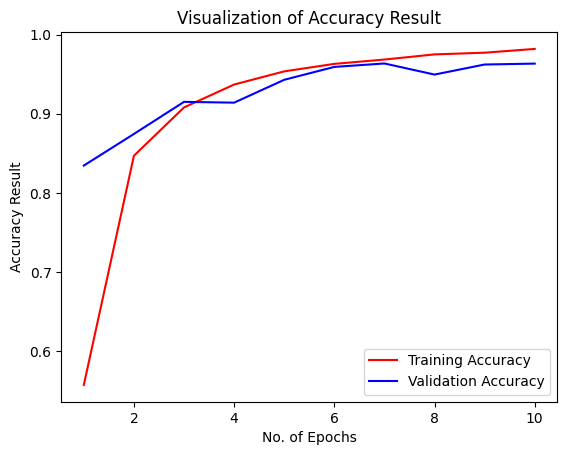

In [31]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy Result")
plt.title("Visualization of Accuracy Result")
plt.legend()
plt.show()

In [32]:
class_name = validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [42]:
test_set = tf.keras.utils.image_dataset_from_directory(
    r'C:\JupyterNotebook\Detection2\test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 33 files belonging to 1 classes.


In [43]:
y_pred = model.predict(test_set)
y_pred,y_pred.shape

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step 


(array([[4.0128691e-09, 4.6244654e-11, 1.0000000e+00, ..., 3.3864570e-14,
         3.2287157e-12, 1.0432779e-12],
        [7.4543044e-10, 2.4335975e-10, 1.0000000e+00, ..., 2.9147146e-13,
         7.7789233e-12, 1.6364582e-12],
        [1.1674434e-07, 1.2422014e-07, 9.9993157e-01, ..., 1.0702396e-08,
         3.7965785e-07, 1.3192934e-07],
        ...,
        [9.1031670e-12, 1.7395550e-12, 1.1556929e-07, ..., 9.9996448e-01,
         7.4732443e-06, 1.3056820e-09],
        [6.0026837e-21, 2.1902739e-24, 9.9664167e-15, ..., 1.0000000e+00,
         8.7371745e-16, 4.2134911e-19],
        [9.9056522e-24, 7.8174109e-25, 3.7223740e-15, ..., 1.0000000e+00,
         9.9279673e-17, 6.8861025e-21]], dtype=float32),
 (33, 38))

In [44]:
predicted_categories = tf.argmax(y_pred,axis=1)

In [45]:
predicted_categories

<tf.Tensor: shape=(33,), dtype=int64, numpy=
array([ 2,  2,  2,  2,  0,  0,  0,  8,  8,  8, 20, 20, 20, 20, 20, 22, 22,
       30, 30, 35, 29, 29, 33, 37, 37, 37, 37, 35, 35, 35, 35, 35, 35],
      dtype=int64)>

In [46]:
true_categories = tf.concat([y for x,y in test_set],axis=0)
true_categories

<tf.Tensor: shape=(33, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]], dtype=float32)>

In [47]:
Y_true = tf.argmax(true_categories,axis=1)
Y_true

<tf.Tensor: shape=(33,), dtype=int64, numpy=
array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)>

In [48]:
from sklearn.metrics import classification_report,confusion_matrix

In [49]:
print(classification_report(Y_true,predicted_categories,target_names=class_name))

ValueError: Number of classes, 10, does not match size of target_names, 38. Try specifying the labels parameter

In [50]:
cm = confusion_matrix(Y_true,predicted_categories)
cm

array([[3, 4, 3, 5, 2, 2, 2, 1, 7, 4],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int64)

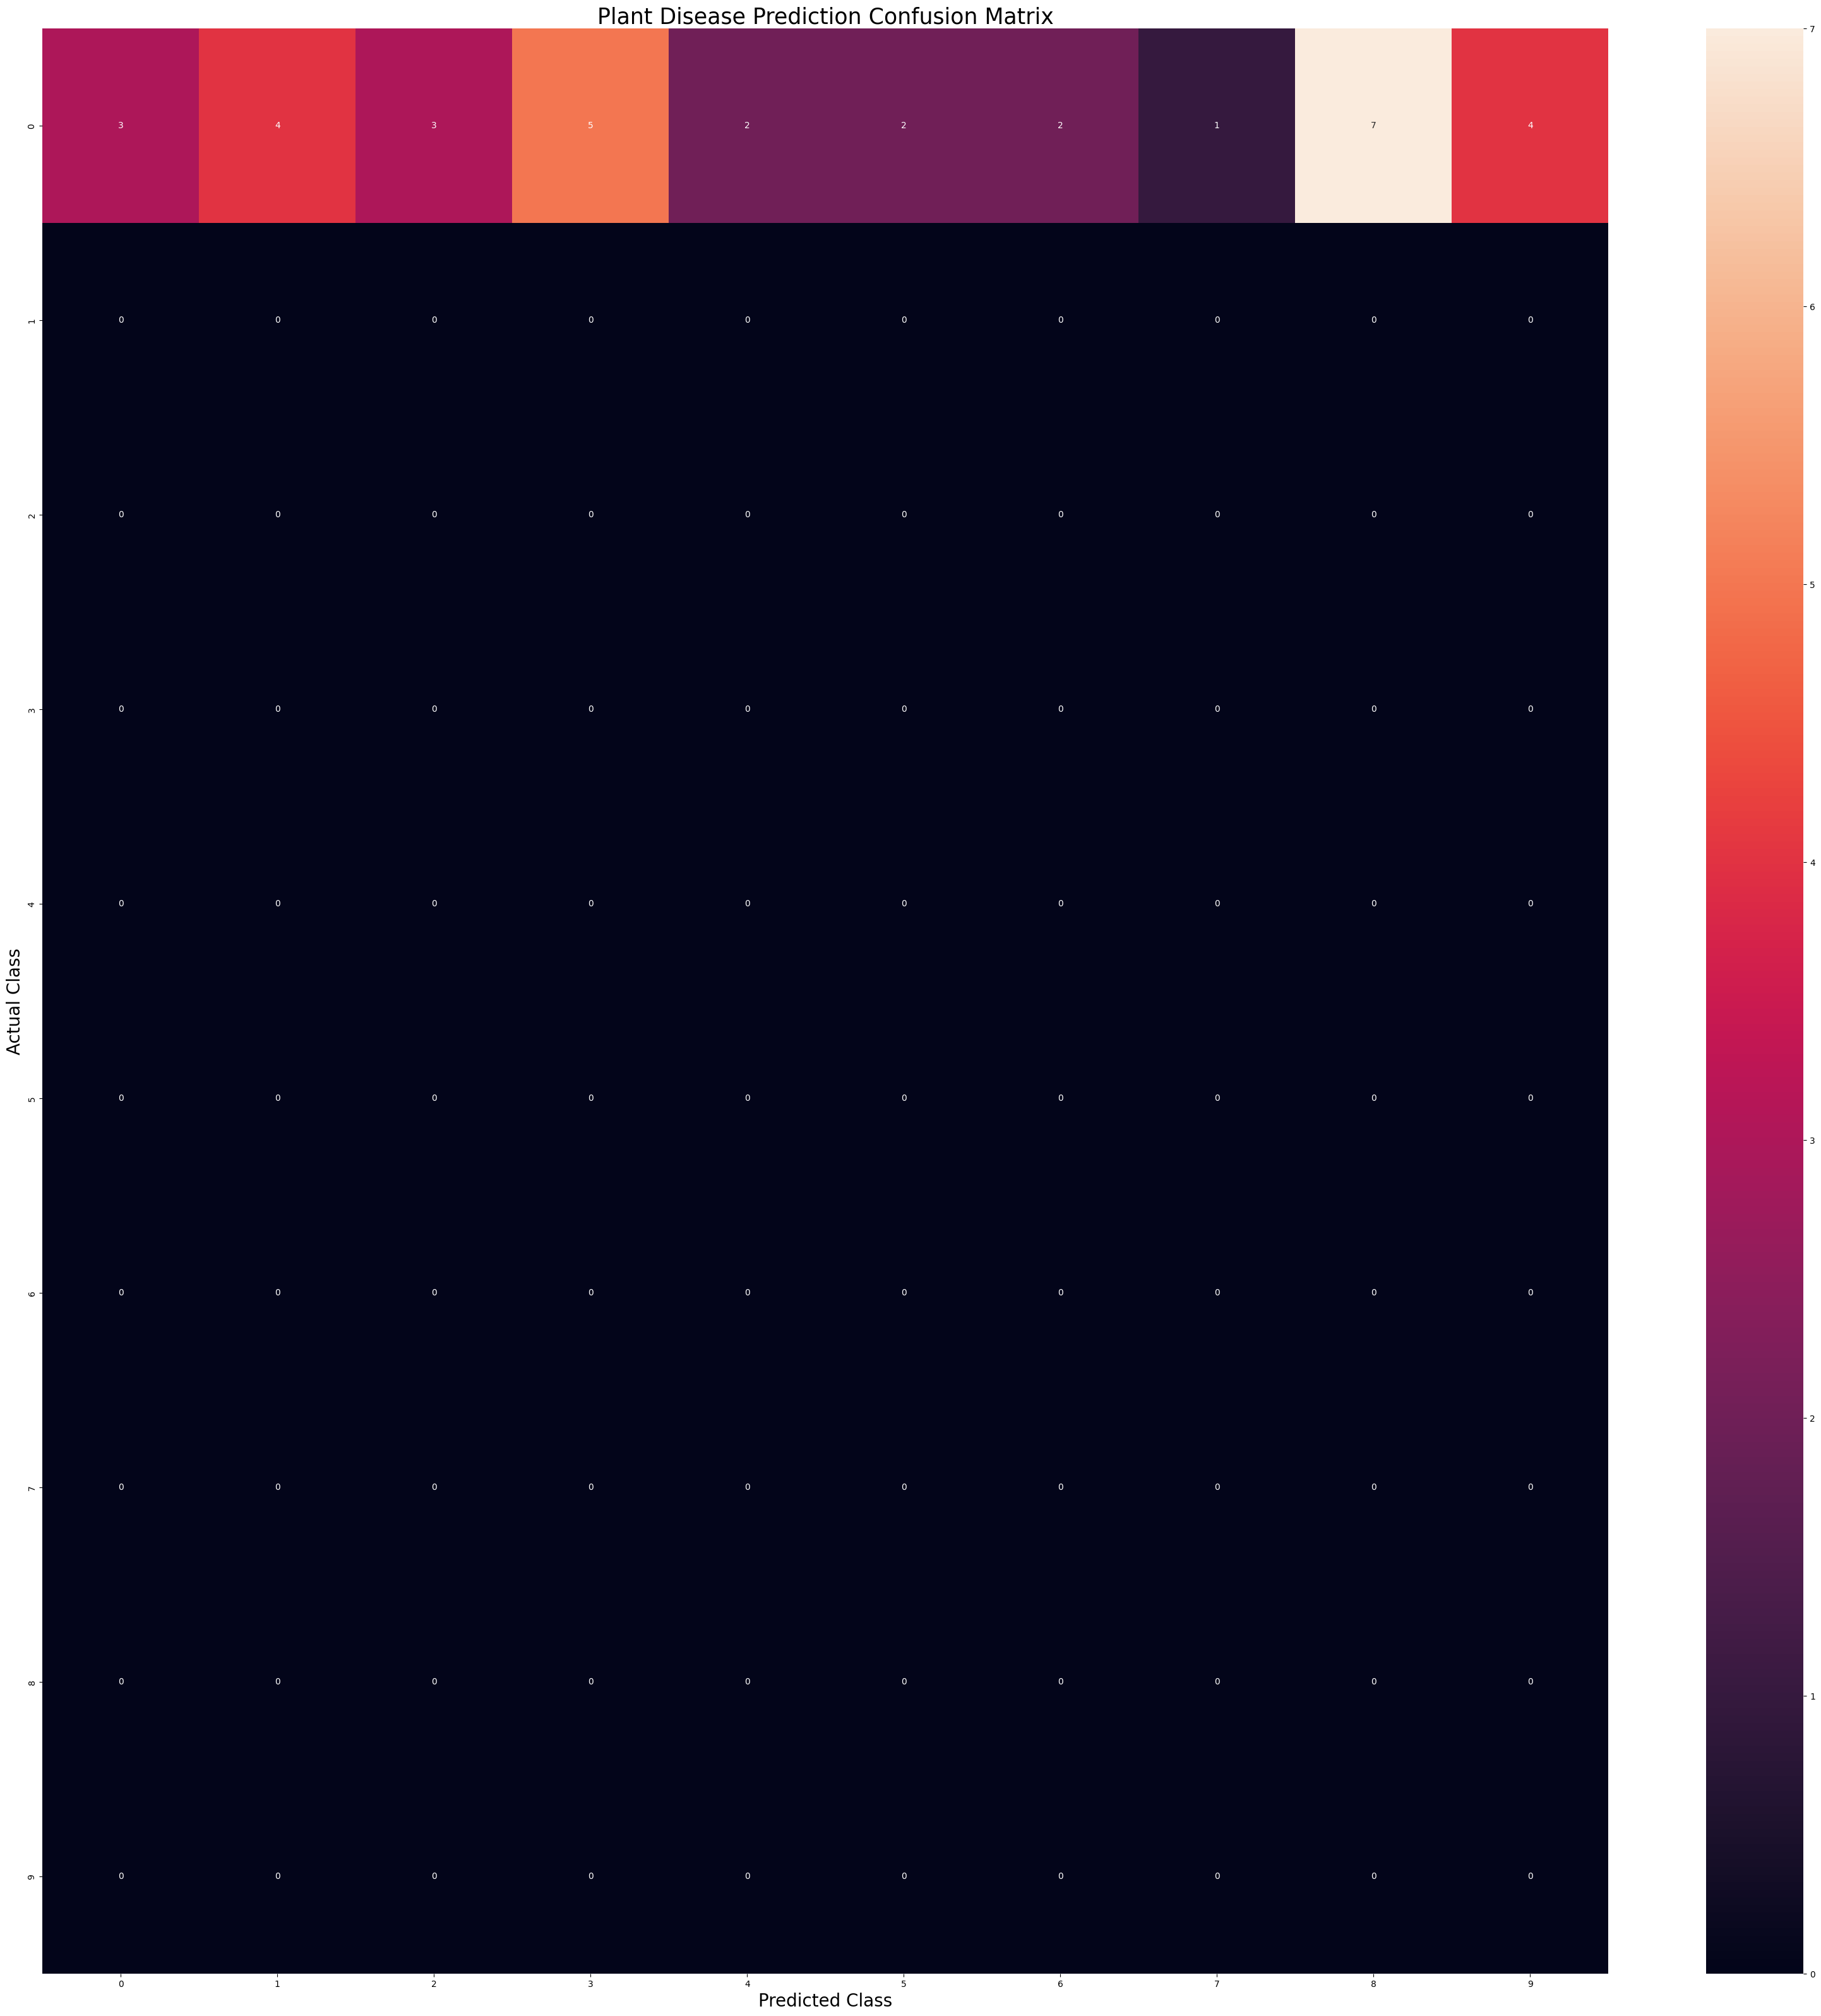

In [51]:
plt.figure(figsize=(40,40))
sns.heatmap(cm,annot=True,annot_kws={'size':10})
plt.xlabel("Predicted Class",fontsize=20)
plt.ylabel("Actual Class",fontsize=20)
plt.title("Plant Disease Prediction Confusion Matrix",fontsize=25)
plt.show()

In [52]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [53]:
model  = tf.keras.models.load_model('trained_model.keras')

In [54]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 126, 126, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 63, 63, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 61, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 30, 30, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1500)                │       3,073,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1500)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 38)                  │          57,038 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,528,288 (89.75 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 15,685,526 (59.84 MB)

In [55]:
!pip install opencv-python

In [1]:
import cv2
image_path = r"C:\Users\Sourin\OneDrive\Desktop\starwberry.jpg"
#Reading Image
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Convert BGR image to RGB

#Displaying Image
plt.imshow(img)
plt.title("Test Image")
plt.xticks([])
plt.yticks([])
plt.show()

NameError: name 'plt' is not defined

In [74]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128, 128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr]) #Convert single image to a batch
print(input_arr.shape)

(1, 128, 128, 3)


In [75]:
prediction = model.predict(input_arr)
prediction,prediction.shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


(array([[6.3211650e-07, 4.3179821e-10, 1.7112575e-07, 1.1512877e-10,
         1.0249671e-10, 1.6430665e-08, 1.4542319e-10, 7.2205397e-09,
         1.2234326e-10, 4.1935233e-09, 4.0690368e-14, 1.9417040e-12,
         1.2532233e-12, 1.8739668e-07, 2.2584271e-11, 5.0382848e-10,
         1.1513041e-08, 9.8979688e-15, 2.7754928e-07, 8.4052782e-12,
         3.6767691e-01, 9.5398418e-09, 3.6714515e-10, 7.4748145e-11,
         3.5844310e-11, 2.8595329e-07, 6.3224202e-01, 3.4787170e-08,
         2.9691818e-09, 4.2654297e-10, 2.0599614e-06, 2.4933785e-08,
         7.6675264e-05, 3.3405344e-11, 3.3829770e-10, 1.6579212e-13,
         2.2192845e-13, 6.9947896e-07]], dtype=float32),
 (1, 38))

In [76]:
result_index = np.argmax(prediction)
result_index

26

In [77]:
class_name = ['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']

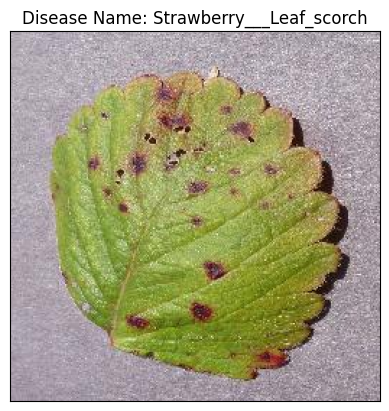

In [78]:
#Displaying Result of disease prediction
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()

In [79]:
model_prediction

'Strawberry___Leaf_scorch'

In [82]:
model.save('DiseaseDetection.keras')


In [17]:
import os
print("Saved models in directory:", os.listdir())


Saved models in directory: ['.ipynb_checkpoints', 'diseaseDetection.h5', 'DiseaseDetection.keras', 'New Plant Diseases Dataset(Augmented)', 'test', 'Train.ipynb', 'training_hist.json']


In [24]:
model_prediction = class_name[result_index] if result_index < len(class_name) else "Unknown"


In [28]:
print("Prediction Output:", prediction)
print("Prediction Shape:", prediction.shape)
print("Result Index:", result_index)


Prediction Output: [[0.02832419 0.00822045 0.03971193 0.02537514 0.01092264 0.0539623
  0.00870176 0.05974666 0.01699476 0.05076815 0.03749226 0.01316426
  0.01215048 0.01293047 0.01208813 0.02843336 0.03235395 0.01152035
  0.01002126 0.01225088 0.01041129 0.02695009 0.01524619 0.01407631
  0.01373802 0.11136151 0.01904741 0.01007831 0.04353891 0.03856955
  0.0890687  0.015924   0.01401224 0.01410182 0.01843247 0.02647767
  0.01124803 0.02258414]]
Prediction Shape: (1, 38)
Result Index: 25


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step


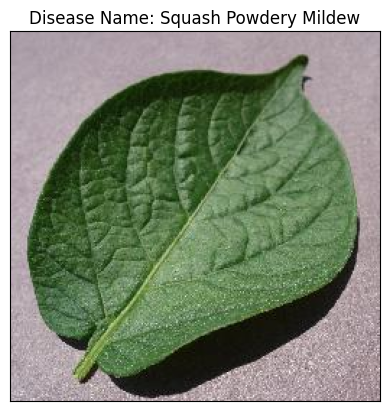

In [40]:
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Correct class names for 38 categories
class_name = [
    "Apple Scab", "Apple Black Rot", "Apple Cedar Rust", "Apple Healthy",
    "Blueberry Healthy", "Cherry Powdery Mildew", "Cherry Healthy",
    "Corn Cercospora Leaf Spot", "Corn Common Rust", "Corn Northern Leaf Blight",
    "Corn Healthy", "Grape Black Rot", "Grape Esca", "Grape Leaf Blight",
    "Grape Healthy", "Orange Haunglongbing", "Peach Bacterial Spot", "Peach Healthy",
    "Pepper Bell Bacterial Spot", "Pepper Bell Healthy", "Potato Early Blight",
    "Potato Late Blight", "Potato Healthy", "Raspberry Healthy", "Soybean Healthy",
    "Squash Powdery Mildew", "Strawberry Leaf Scorch", "Strawberry Healthy",
    "Tomato Bacterial Spot", "Tomato Early Blight", "Tomato Late Blight",
    "Tomato Leaf Mold", "Tomato Septoria Leaf Spot", "Tomato Spider Mites",
    "Tomato Target Spot", "Tomato Yellow Leaf Curl Virus", "Tomato Mosaic Virus",
    "Tomato Healthy"
]


# Load the model
model = tf.keras.models.load_model(r"C:\JupyterNotebook\Detection2\diseaseDetection.h5")

# Image path
image_path = r"C:\JupyterNotebook\Detection2\test\test\PotatoHealthy2.JPG"

# Image preprocessing
image = tf.keras.preprocessing.image.load_img(image_path, target_size=(128, 128))
input_arr = tf.keras.preprocessing.image.img_to_array(image) / 255.0
input_arr = np.expand_dims(input_arr, axis=0)

# Prediction
prediction = model.predict(input_arr)
result_index = np.argmax(prediction)

# Safe index handling
if result_index < len(class_name):
    model_prediction = class_name[result_index]
else:
    model_prediction = "Unknown"

# Displaying the result
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()
